In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

100% 435M/435M [00:06<00:00, 77.2MB/s]



In [ ]:
from zipfile import ZipFile
file_name = 'dogs-cats-images.zip'


with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("SUCCESSFULLY UNZIPPED")

SUCCESSFULLY UNZIPPED


# DATA COLLECTION COMPLETED



In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
tensorflow.__version__

'1.15.2'

ann_visualizer,graphviz are used for visualizing the model

In [ ]:
!pip install ann_visualizer
!pip install graphviz
import ann_visualizer
import graphviz

livelossplot is used to plot accuuracy and loss curves during training

In [ ]:
!pip install --upgrade git+https://github.com/stared/livelossplot
import livelossplot


  Cloning https://github.com/stared/livelossplot to /tmp/pip-req-build-xl32_a_f
  Running command git clone -q https://github.com/stared/livelossplot /tmp/pip-req-build-xl32_a_f
  Created wheel for livelossplot: filename=livelossplot-0.5.3-cp36-none-any.whl size=22611 sha256=c78c695934c0665a8e8466f001be512fda1f120973349976be24a15090540104
  Stored in directory: /tmp/pip-ephem-wheel-cache-80k2rne0/wheels/69/68/83/a6806bd6755d0f7a7221f14fb1f8809e3c01dc4b2e097fa78a
Successfully built livelossplot
  Found existing installation: livelossplot 0.5.3
    Uninstalling livelossplot-0.5.3:
      Successfully uninstalled livelossplot-0.5.3


# Model 1


In [ ]:
classifier1  = Sequential()
classifier1.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation = 'relu'))
classifier1.add(MaxPool2D(pool_size = (2,2)))

classifier1.add(Flatten())
classifier1.add(Dense(units = 128,activation = 'relu'))
classifier1.add( Dropout(0.3) )
classifier1.add(Dense(units = 1  ,activation = 'sigmoid'))

classifier1.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [ ]:
classifier1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
____________________________________________

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(classifier1,view=True,filename="classifier1", title="classifier1")

# Generating Image data with augmentation
 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range = 0.2,
                zoom_range  = 0.2,
                horizontal_flip = True,
                width_shift_range=0.2,
                height_shift_range=0.2
                )
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
        '/content/dataset/training_set',  # this is the target directory
        target_size=(64, 64), 
        batch_size=32,
        class_mode='binary',
        shuffle=True
        )
test_set = test_datagen.flow_from_directory(
        '/content/dataset/test_set',
        target_size = (64,64),
        batch_size =32,
        class_mode = 'binary',
        shuffle=True
        )


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras

In [ ]:
TRAINING_LOGS_FILE = "training_logs_classifier1.csv"

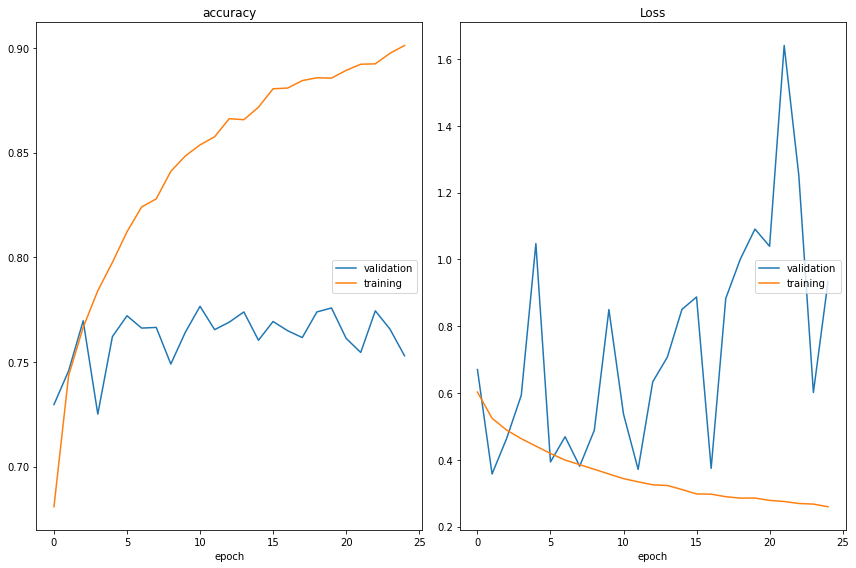

accuracy
	validation       	 (min:    0.725, max:    0.777, cur:    0.753)
	training         	 (min:    0.681, max:    0.901, cur:    0.901)
Loss
	validation       	 (min:    0.357, max:    1.640, cur:    0.933)
	training         	 (min:    0.259, max:    0.603, cur:    0.259)
0.015116371000431172


In [ ]:
import timeit
start = timeit.timeit()
classifier1.fit(training_set,
               epochs = 25,
               steps_per_epoch = 1000,
               validation_data= test_set,
               validation_steps = 200,
               callbacks=[PlotLossesKeras(),
               CSVLogger( TRAINING_LOGS_FILE, append=True,separator=";" )] 
              )

end = timeit.timeit()
classifier1_time = end - start
print(classifier1_time)

In [ ]:
classifier1_json = classifier1.to_json()
with open("classifier1.json", "w") as json_file:
    json_file.write(classifier1_json)
classifier1.save_weights("classifier1.h5")
print("Saved model to disk")


Saved model to disk


In [ ]:
from google.colab import files
files.upload()

Saving single_prediction.zip to single_prediction.zip


{'single_prediction.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x007\xbd\xf5P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\x00\x00\x00single_prediction/PK\x03\x04\n\x00\x00\x00\x00\x00$\x98rOb\x12\n\x93\xb6\x16\x02\x00\xb6\x16\x02\x00"\x00\x00\x00single_prediction/cat_or_dog_1.jpg\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00\x16Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x02\xd0\x03\xc0\x03\x01"\x00\x02\x11\x01\

In [ ]:
!mkdir final_single_test
!unzip single_prediction.zip -d final_single_test

Archive:  single_prediction.zip
   creating: final_single_test/single_prediction/
 extracting: final_single_test/single_prediction/cat_or_dog_1.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_2.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_3.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_4.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_5.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_6.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_7.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_8.jpg  
  inflating: final_single_test/single_prediction/cat_or_dog_9.jpg  


In [ ]:
single_test = test_datagen.flow_from_directory(
        '/content/final_single_test',
        target_size = (64,64),
        batch_size = 1,
        class_mode = 'binary',
        )


Found 9 images belonging to 1 classes.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

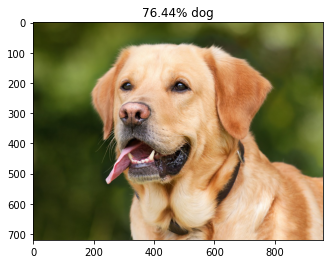

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

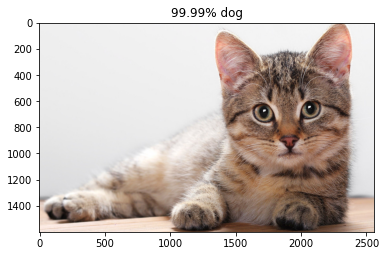

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

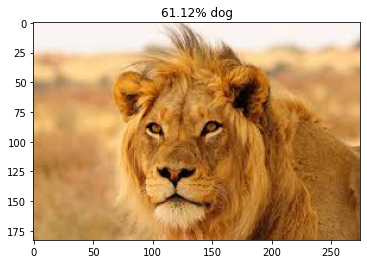

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

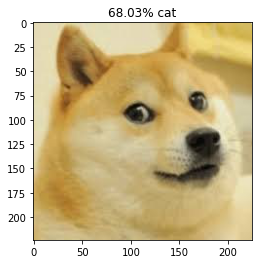

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

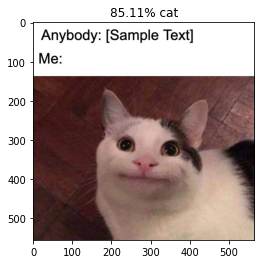

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

probabilities = classifier1.predict_generator(single_test)
for index, probability in enumerate(probabilities):
    image_path = "/content/final_single_test" + "/" + single_test.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.savefig('/content/final_single_test/result/final_result'+'-'+str(index)+'.jpg')
    files.download('/content/final_single_test/result/final_result'+'-'+str(index)+'.jpg')
    plt.show()
    



# Classifier 2

In [ ]:
classifier2  = Sequential()
classifier2.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation = 'relu'))
classifier2.add(MaxPool2D(pool_size = (2,2)))

classifier2.add(Convolution2D(32,3,3,activation='relu'))
classifier2.add(MaxPool2D(pool_size = (2,2)))

classifier2.add(Flatten())
classifier2.add(Dense(units =128,activation = 'relu'))
classifier2.add( Dropout(0.4) )

classifier2.add(Dense(units = 1  ,activation = 'sigmoid'))

classifier2.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [ ]:
classifier2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 32)         

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(classifier2,view=True,filename="classifier2a", title="classifier2a")

In [ ]:
TRAINING_LOGS_FILE = "training_logs_classifier2.csv"

In [ ]:
import time
start = time.time()
classifier2.fit(training_set,
                epochs = 25,
               steps_per_epoch = 4000,
               validation_data= test_set,
               validation_steps = 1000,
               callbacks=[PlotLossesKeras(),
               CSVLogger( TRAINING_LOGS_FILE, append=True,separator=";" )] 
              )

end = time.time()
classifier2_time = end - start
print(classifier2_time)

In [ ]:
classifier2_json = classifier2.to_json()
with open("classifier2.json", "w") as json_file:
    json_file.write(classifier2_json)
classifier2.save_weights("classifier2.h5")
print("Saved model to disk")


Saved model to disk


In [ ]:
from google.colab import files
files.download('/content/classifier2.json')
files.download('/content/classifier2.h5')
#files.download('/content/training_logs_classifier2.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
single_test = test_datagen.flow_from_directory(
        '/content/single_test',
        target_size = (64,64),
        batch_size = 1,
        class_mode = 'binary',
        )


Found 6 images belonging to 1 classes.


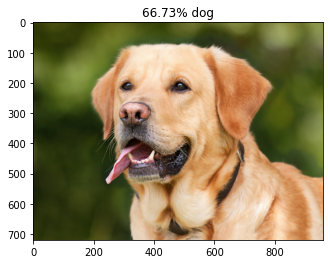

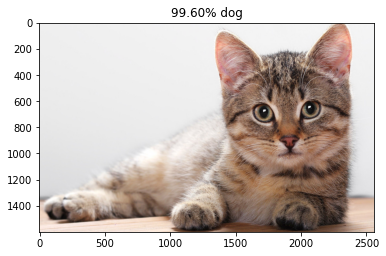

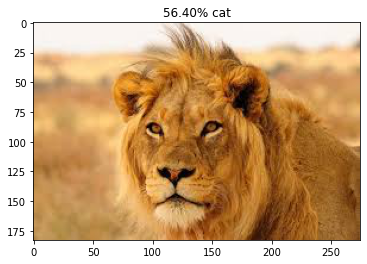

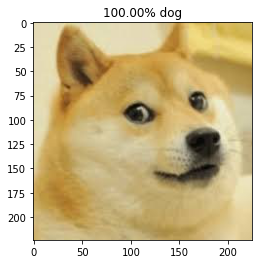

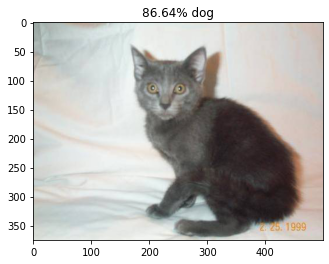

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

probabilities = classifier2.predict_generator(single_test)
for index, probability in enumerate(probabilities):
    image_path = "/content/single_test" + "/" + single_test.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    #plt.savefig('/content/result/final_result_cl2'+'-'+str(index)+'.jpg')
    #files.download('/content/result/final_result_cl2'+'-'+str(index)+'.jpg')
    plt.show()
    



#Classifier 3



In [ ]:
import tensorflow as tf

In [ ]:
from keras.optimizers import RMSprop
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.9,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

In [ ]:
classifier3  = Sequential()
classifier3.add(Conv2D(64,(3,3), input_shape=(64,64,3), activation = 'relu'))
classifier3.add(Conv2D(128,(3,3),activation='relu'))

classifier3.add(Conv2D(256,(3,3),activation='relu'))
classifier3.add(MaxPool2D(pool_size = (2,2)))

classifier3.add(Conv2D(256,(3,3),activation='relu'))
classifier3.add(MaxPool2D(pool_size = (2,2)))


classifier3.add(Conv2D(512,(3,3),activation='relu'))
classifier3.add(MaxPool2D(pool_size = (2,2)))


classifier3.add(Flatten())
classifier3.add(Dense(units = 256,activation = 'relu'))
classifier3.add( Dropout(0.4) )



classifier3.add(Dense(units = 1  ,activation = 'sigmoid'))

classifier3.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'] )

classifier3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 58, 58, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 27, 27, 256)       590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 512)      

In [ ]:
classifier3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 58, 58, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 27, 27, 256)       590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 512)      

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(classifier3,view=True,filename="classifier3", title="classifier3")

In [ ]:
TRAINING_LOGS_FILE = "training_logs_classifier3.csv"

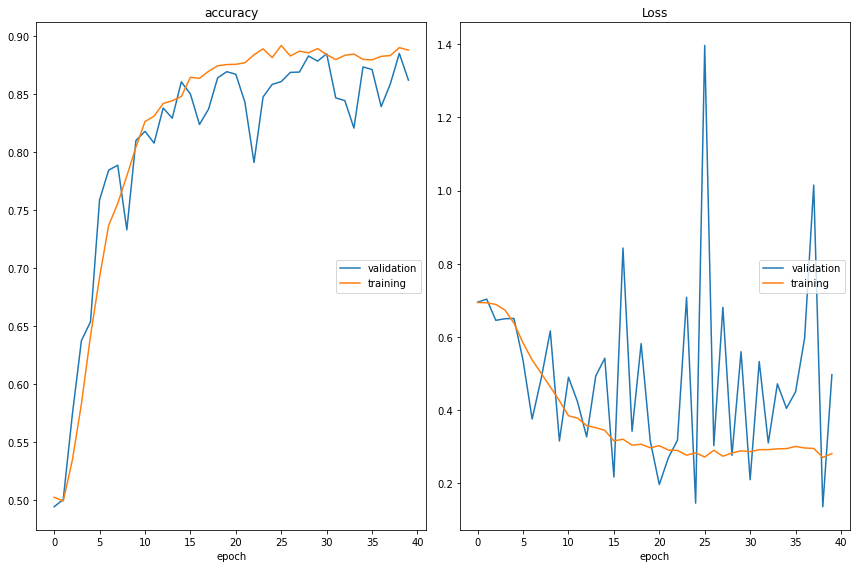

accuracy
	validation       	 (min:    0.494, max:    0.885, cur:    0.862)
	training         	 (min:    0.499, max:    0.892, cur:    0.888)
Loss
	validation       	 (min:    0.136, max:    1.396, cur:    0.497)
	training         	 (min:    0.271, max:    0.694, cur:    0.281)
3052.0956897735596


In [ ]:
import time
start = time.time()
classifier3.fit(training_set,
               epochs = 40,
               steps_per_epoch = 400,
               validation_data= test_set,
               validation_steps = 100,
               callbacks=[PlotLossesKeras(),
               CSVLogger( TRAINING_LOGS_FILE, append=True,separator=";" )] 
              )

end = time.time()
classifier3_time = end - start
print(classifier3_time)

In [ ]:
single_test = test_datagen.flow_from_directory(
        '/content/final_single_test',
        target_size = (64,64),
        batch_size = 1,
        class_mode = 'binary',
        )


Found 9 images belonging to 1 classes.


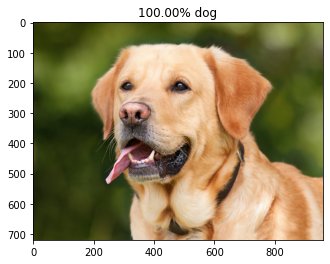

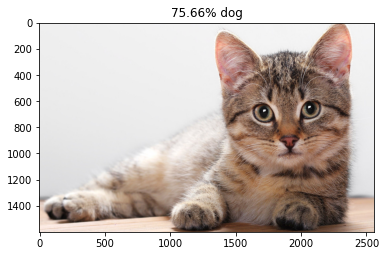

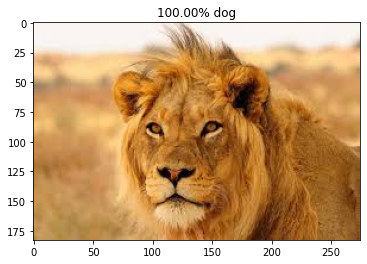

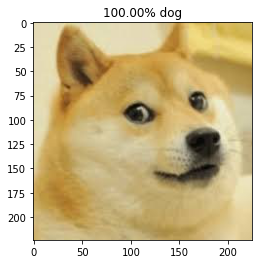

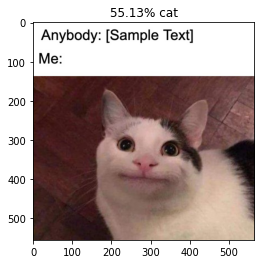

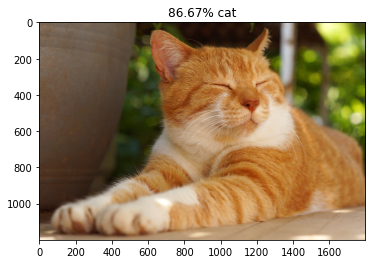

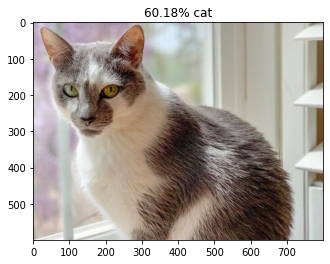

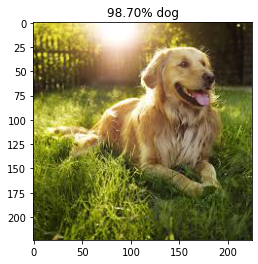

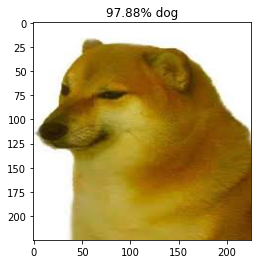

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

probabilities = classifier3.predict_generator(single_test)
for index, probability in enumerate(probabilities):
    image_path = "/content/final_single_test" + "/" + single_test.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    #plt.savefig('/content/result/final_result_cl2'+'-'+str(index)+'.jpg')
    #files.download('/content/result/final_result_cl2'+'-'+str(index)+'.jpg')
    plt.show()
    



In [ ]:
classifier3_json = classifier3.to_json()
with open("classifier3.json", "w") as json_file:
    json_file.write(classifier3_json)
classifier3.save_weights("classifier3.h5")
print("Saved model to disk")


Saved model to disk


In [ ]:
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.9,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

In [ ]:
classifier3  = tf.keras.models.Sequential()
classifier3.add( tf.keras.layers.Conv2D(64,(3,3), input_shape=(64,64,3), activation = 'relu'))
classifier3.add( tf.keras.layers.Conv2D(128,(3,3),activation='relu'))

classifier3.add( tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
classifier3.add( tf.keras.layers.MaxPool2D(pool_size = (2,2)))

classifier3.add( tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
classifier3.add( tf.keras.layers.MaxPool2D(pool_size = (2,2)))


classifier3.add( tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
classifier3.add( tf.keras.layers.MaxPool2D(pool_size = (2,2)))


classifier3.add( tf.keras.layers.Flatten())
classifier3.add( tf.keras.layers.Dense(units = 256,activation = 'relu'))
classifier3.add( tf.keras.layers.Dropout(0.4) )



classifier3.add( tf.keras.layers.Dense(units = 1  ,activation = 'sigmoid'))

classifier3.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'] )

classifier3.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 256)       295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 512)      

In [ ]:
from tensorflow.keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
TRAINING_LOGS_FILE = "training_logs_classifier3.csv"

In [ ]:

import time
start = time.time()
classifier3.fit(training_set,
               epochs = 25,
               steps_per_epoch = 500,
               validation_data= test_set,
               validation_steps = 125 
              )

end = time.time()
classifier3_time = end - start
print(classifier3_time)


Classifier4


In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.9,
    epsilon=1e-07,
    centered=False,
    
    name="RMSprop"
)

In [ ]:
def getModel():
  model4 = Sequential()
  model4.add(Conv2D(64,(3,3), input_shape=(128,128,3), activation = 'relu'))
  model4.add(Conv2D(128,(3,3),activation='relu'))
  
  model4.add(Conv2D(256,(3,3),activation='relu'))
  model4.add(MaxPool2D(pool_size = (2,2)))

  model4.add(Conv2D(256,(3,3),activation='relu'))
  model4.add(MaxPool2D(pool_size = (2,2)))

  model4.add(Conv2D(512,(3,3),activation='relu'))
  model4.add(MaxPool2D(pool_size = (2,2)))


  model4.add(Flatten())
  model4.add(Dense(units = 256,activation = 'relu'))
  model4.add( Dropout(0.4) )



  model4.add(Dense(units = 1  ,activation = 'sigmoid'))

  model4.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'] )

  
  return model4


In [ ]:
del model

In [ ]:
model = getModel()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 256)     295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 256)       590080    
_________________________________________________________________
max_pooling2d

In [ ]:
#from ann_visualizer.visualize import ann_viz
#ann_viz(model,view=True,filename="model4", title="model4")
TRAINING_LOGS_FILE = "training_logs_model4.csv"

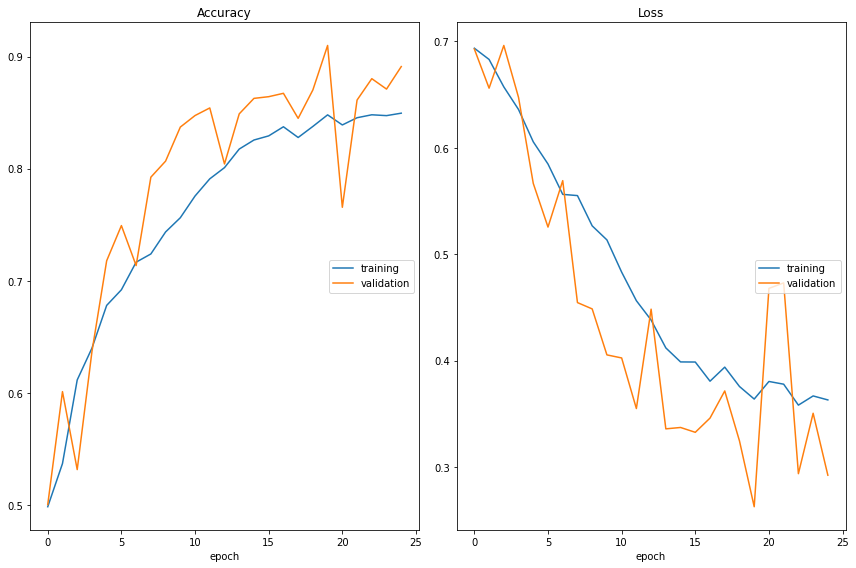

Accuracy
	training         	 (min:    0.498, max:    0.850, cur:    0.850)
	validation       	 (min:    0.501, max:    0.910, cur:    0.891)
Loss
	training         	 (min:    0.358, max:    0.694, cur:    0.363)
	validation       	 (min:    0.263, max:    0.696, cur:    0.292)
500/500 [==============================] - 150s 300ms/step - loss: 0.3630 - acc: 0.8495 - val_loss: 0.2922 - val_acc: 0.8911
3758.253257036209


In [ ]:
# Train completely and try withmore dataset and
# changing batch sizes
import time
start = time.time()
model.fit(training_set,
                epochs = 25,
                steps_per_epoch = 500,
                validation_data= test_set,
                validation_steps = 125,
                callbacks=[PlotLossesKeras(),
                CSVLogger( TRAINING_LOGS_FILE, append=True,separator=";" )] 
              )

end = time.time()
classifier4_time = end - start
print(classifier4_time)

In [ ]:
model.save('model.h5')

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'1.15.2'

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model_file( '/content/model.h5' ) # Your model's name
modeltf = converter.convert()
file = open( 'model.tflite' , 'wb' ) 
file.write(modeltf)

INFO:tensorflow:Froze 14 variables.
INFO:tensorflow:Converted 14 variables to const ops.


97174248

In [ ]:
model = tensorflow.keras.models.load_model( '/content/model.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model_file( '/content/model.h5' ) # Your model's name
modeltf = converter.convert()
file = open( 'model.tflite' , 'wb' ) 
file.write(modeltf)

INFO:tensorflow:Froze 14 variables.
INFO:tensorflow:Converted 14 variables to const ops.


97174248